In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/content/task 11 datset.csv')

In [6]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [8]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


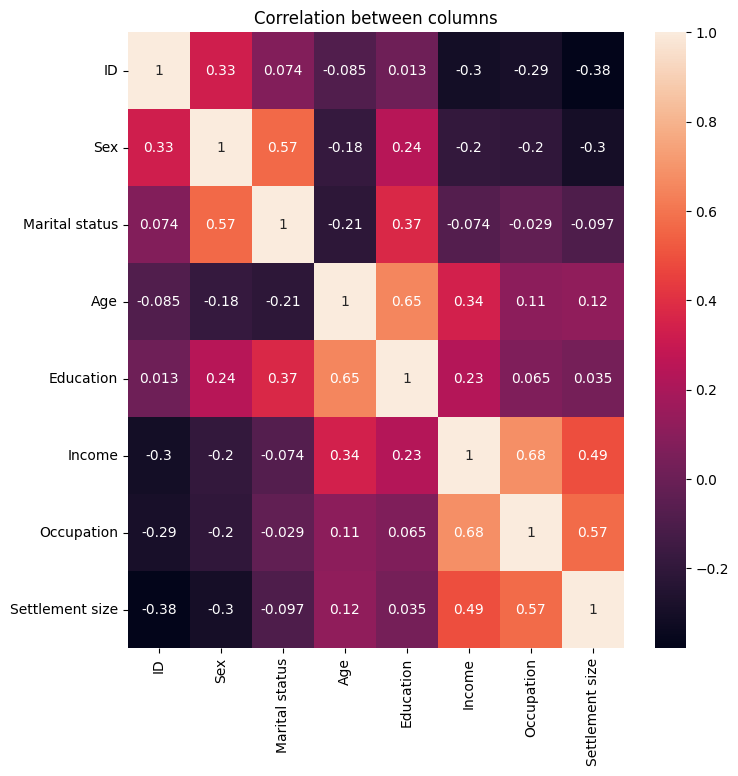

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between columns')
plt.show()

In [11]:
def print_plot(var1, var2):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data = df, x = var1, hue = var2)
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.bar_label(ax.containers[1], fontsize=10)
    ax.set(title = f'{var1} per {var2}')
    ax.legend(loc = 'upper left')
    ax.set_yticks([])
    ax.set_ylabel('')

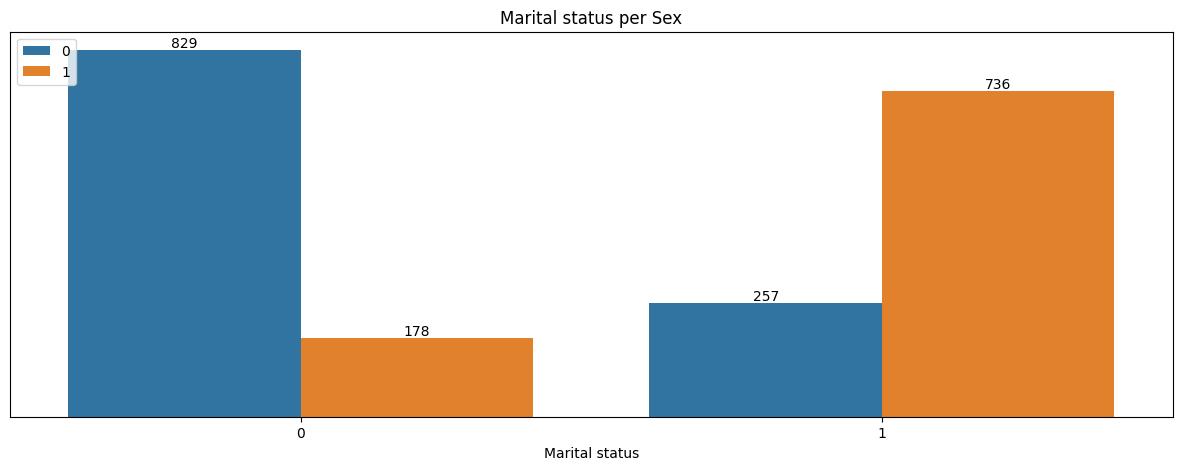

In [12]:
print_plot('Marital status','Sex')

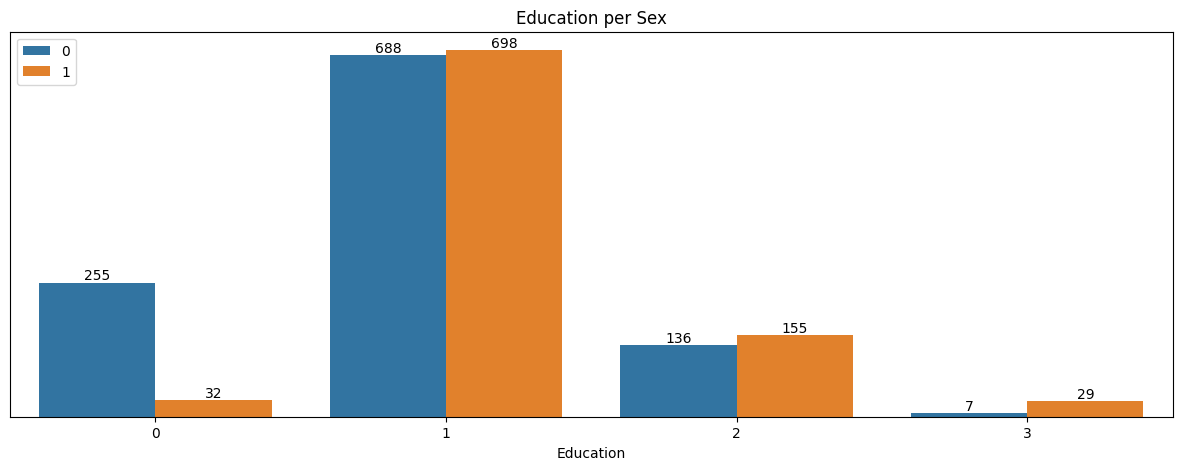

In [13]:
print_plot('Education','Sex')

<Axes: xlabel='Education', ylabel='Age'>

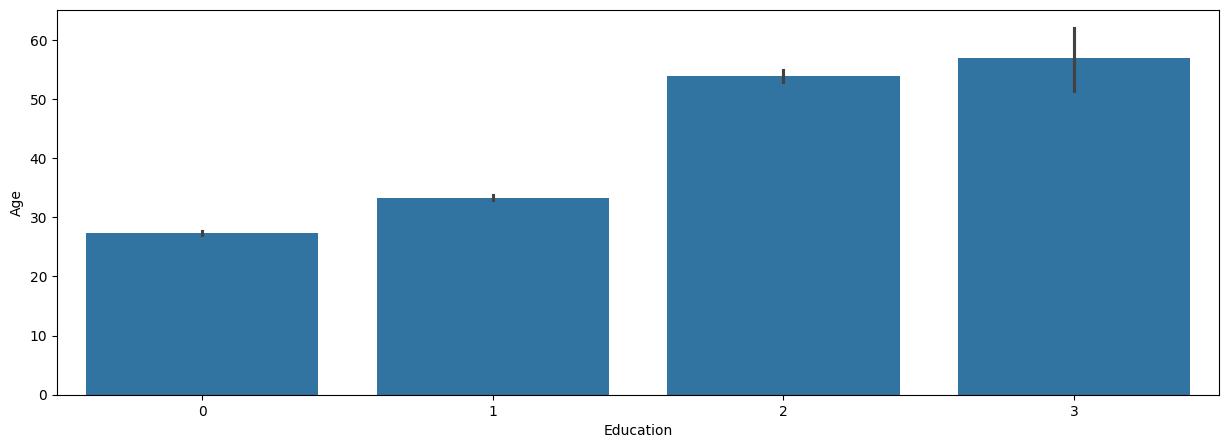

In [14]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Education', y = 'Age')

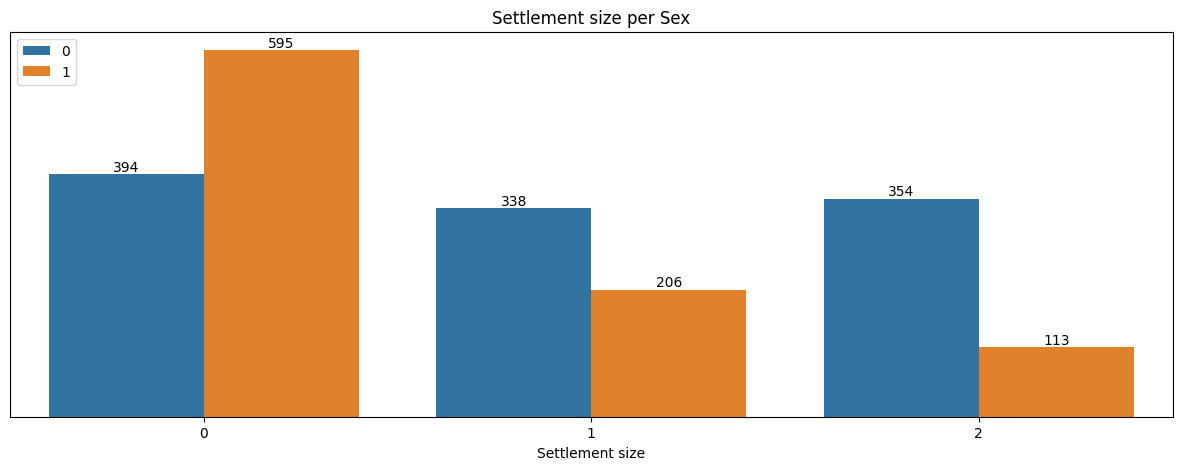

In [15]:
print_plot('Settlement size','Sex')

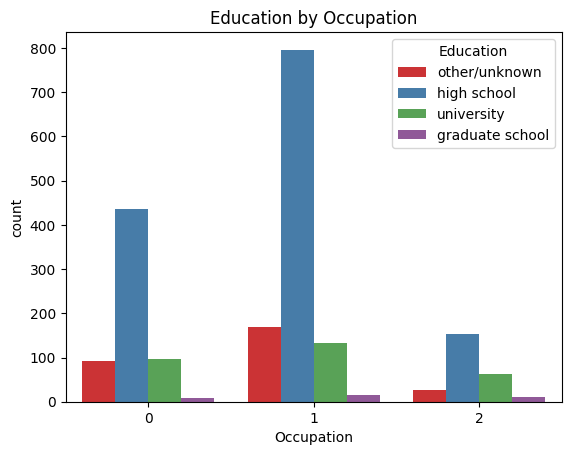

In [16]:
sns.countplot(x=df['Occupation'], hue=df['Education'], palette='Set1')


plt.title('Education by Occupation')
plt.xlabel('Occupation')
plt.ylabel('count')
plt.legend(title='Education', labels=['other/unknown', 'high school', 'university', 'graduate school'])

plt.show()

Text(0.5, 1.0, 'Sex Distribution')

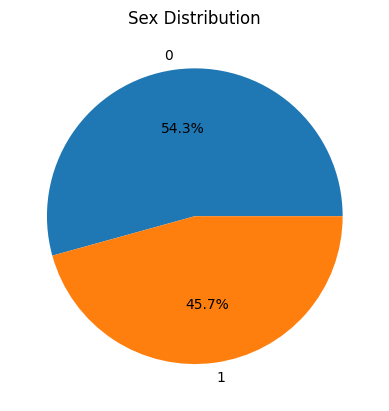

In [17]:
gender= df['Sex'].value_counts()
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title("Sex Distribution")

**Dimensionality Reduction**  

 Reducing the features without losing information.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [20]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [21]:
scaled_data = scaler.transform(df)

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(scaled_data)

PCA(n_components=2)

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
scaled_data.shape

(2000, 8)

In [27]:
x_pca.shape

(2000, 2)

## We've reduced 8 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

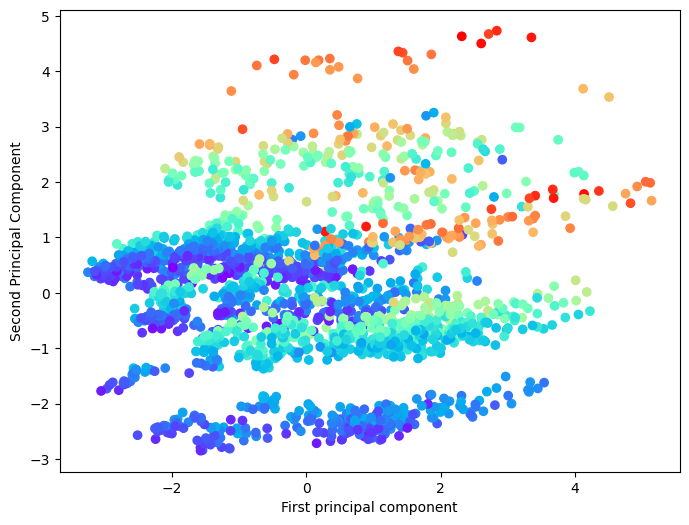

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Age'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

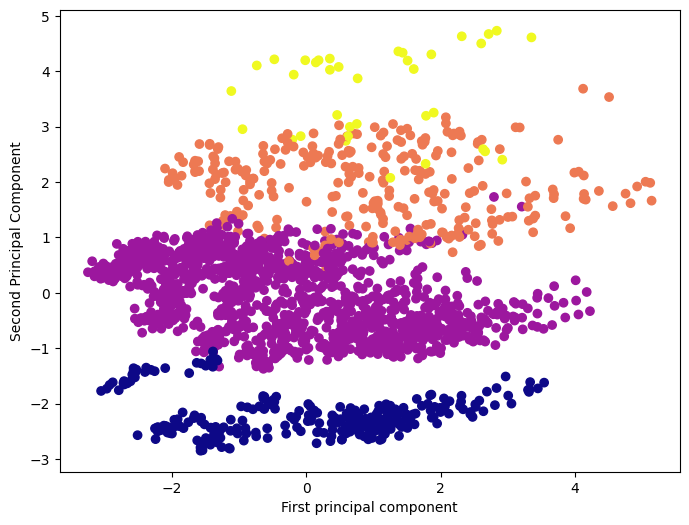

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Education'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

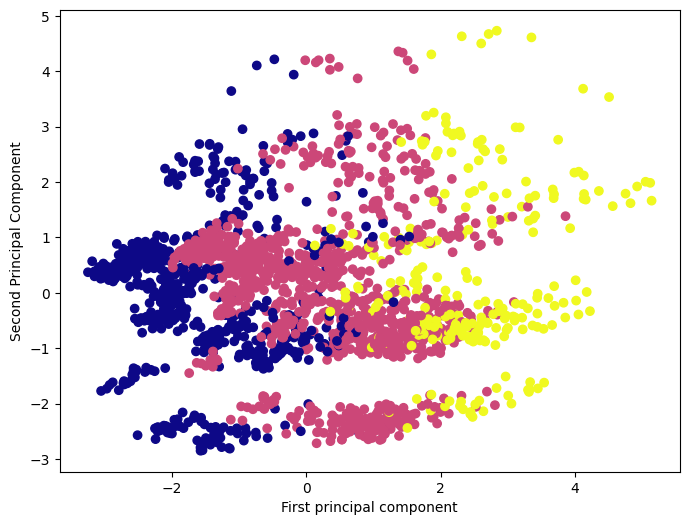

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Occupation'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')